############################(All Rights Reserved)##########################
abdulkader hajjouz
I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
dataset_base_path = r'E:\AWS\processed\dosdb\DOS-DDOS-BENIGN'


In [3]:
types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

def replace_infinity_with_mean(df):
    inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
    for col in inf_columns:
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df


def replace_negative_values_with_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.values

    columns = [c for c in numeric_cols if df[df[c] < 0][c].count() > 0]
    for col in columns:
        mask = df[col] < 0
        df.loc[mask, col] = np.nan
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df


def load_dataset(files, dtypes, cols=None):
    df = pd.concat((pd.read_csv(f, dtype=dtypes, usecols=cols) for f in files))
    df = replace_infinity_with_mean(df)
    df = replace_negative_values_with_mean(df)
    return df

In [4]:
 csv_files = glob.glob(os.path.join(dataset_base_path, '*.csv'))

df = load_dataset(csv_files, types)
df

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,6,7/7/2017 3:30,3.0,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,55054,6,7/7/2017 3:30,109.0,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,55055,6,7/7/2017 3:30,52.0,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,46236,6,7/7/2017 3:30,34.0,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,54863,6,7/7/2017 3:30,3.0,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
1048570,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
1048571,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
1048572,21,6,16/02/2018 10:36:33,5.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest


In [5]:
X = df.drop(columns=['label'])
# List of selected classes
selected_classes = [
    'Benign',
    'DDOS LOIT',
    'DoS attacks-Hulk',
    'DDOS attack-HOIC',
    'DDoS attacks-LOIC-HTTP',
    'DoS attacks-SlowHTTPTest',
    'DoS attacks-GoldenEye',
    'DoS attacks-Slowloris',
    'DDOS attack-LOIC-UDP'
]

# Filter the dataframe
filtered_df = df[df['label'].isin(selected_classes)]

# Now, you can proceed with your analysis on the filtered_df

In [6]:
# Create a new column 'combined_label' to store the combined class labels
filtered_df['combined_label'] = filtered_df['label']

# Combine 'FTP-BruteForce' and 'DoS attacks-SlowHTTPTest' into one class
filtered_df.loc[filtered_df['label'].isin(['DDOS attack-LOIC-UDP', 'DDoS attacks-LOIC-HTTP']), 'combined_label'] = 'DDOS attack-LOIC-UDP-HTTP'

# Display the first few rows of the DataFrame to verify the changes
print(filtered_df.head())


   dst_port  protocol      timestamp  flow_duration  tot_fwd_pkts  \
0     54865         6  7/7/2017 3:30            3.0             2   
1     55054         6  7/7/2017 3:30          109.0             1   
2     55055         6  7/7/2017 3:30           52.0             1   
3     46236         6  7/7/2017 3:30           34.0             1   
4     54863         6  7/7/2017 3:30            3.0             2   

   tot_bwd_pkts  totlen_fwd_pkts  totlen_bwd_pkts  fwd_pkt_len_max  \
0             0               12                0                6   
1             1                6                6                6   
2             1                6                6                6   
3             1                6                6                6   
4             0               12                0                6   

   fwd_pkt_len_min  ...  active_mean  active_std  active_max  active_min  \
0                6  ...          0.0         0.0           0           0   
1           


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
X1 = filtered_df.drop(columns=['label','combined_label'])
y1 = filtered_df[['combined_label']]

In [8]:
X1

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
0,54865,6,7/7/2017 3:30,3.0,2,0,12,0,6,6,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,55054,6,7/7/2017 3:30,109.0,1,1,6,6,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
2,55055,6,7/7/2017 3:30,52.0,1,1,6,6,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,46236,6,7/7/2017 3:30,34.0,1,1,6,6,6,6,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
4,54863,6,7/7/2017 3:30,3.0,2,0,12,0,6,6,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
1048570,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
1048571,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
1048572,21,6,16/02/2018 10:36:33,5.0,1,1,0,0,0,0,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0


In [9]:
y1

,combined_label
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign
...,...
1048569,DoS attacks-SlowHTTPTest
1048570,DoS attacks-SlowHTTPTest
1048571,DoS attacks-SlowHTTPTest
1048572,DoS attacks-SlowHTTPTest


In [10]:
y1.combined_label.value_counts()

combined_label
Benign                       9713988
DoS attacks-Hulk              692985
DDOS attack-HOIC              686012
DDOS attack-LOIC-UDP-HTTP     577921
DoS attacks-SlowHTTPTest      145389
DDOS LOIT                     128027
DoS attacks-GoldenEye          51801
DoS attacks-Slowloris          16786
Name: count, dtype: int64

In [11]:
X=X1
y=y1

In [12]:
stats = X.describe()
std = stats.loc['std']
features_no_variance = std[std == 0.0].index
pd.Series(features_no_variance).sort_values()

9    bwd_blk_rate_avg
7      bwd_byts_b_avg
8      bwd_pkts_b_avg
0       bwd_psh_flags
2       bwd_urg_flags
3      cwe_flag_count
6    fwd_blk_rate_avg
4      fwd_byts_b_avg
5      fwd_pkts_b_avg
1       fwd_urg_flags
dtype: object

In [13]:
X = X.drop(columns=features_no_variance)


In [14]:
X = X.drop(columns=['timestamp'])


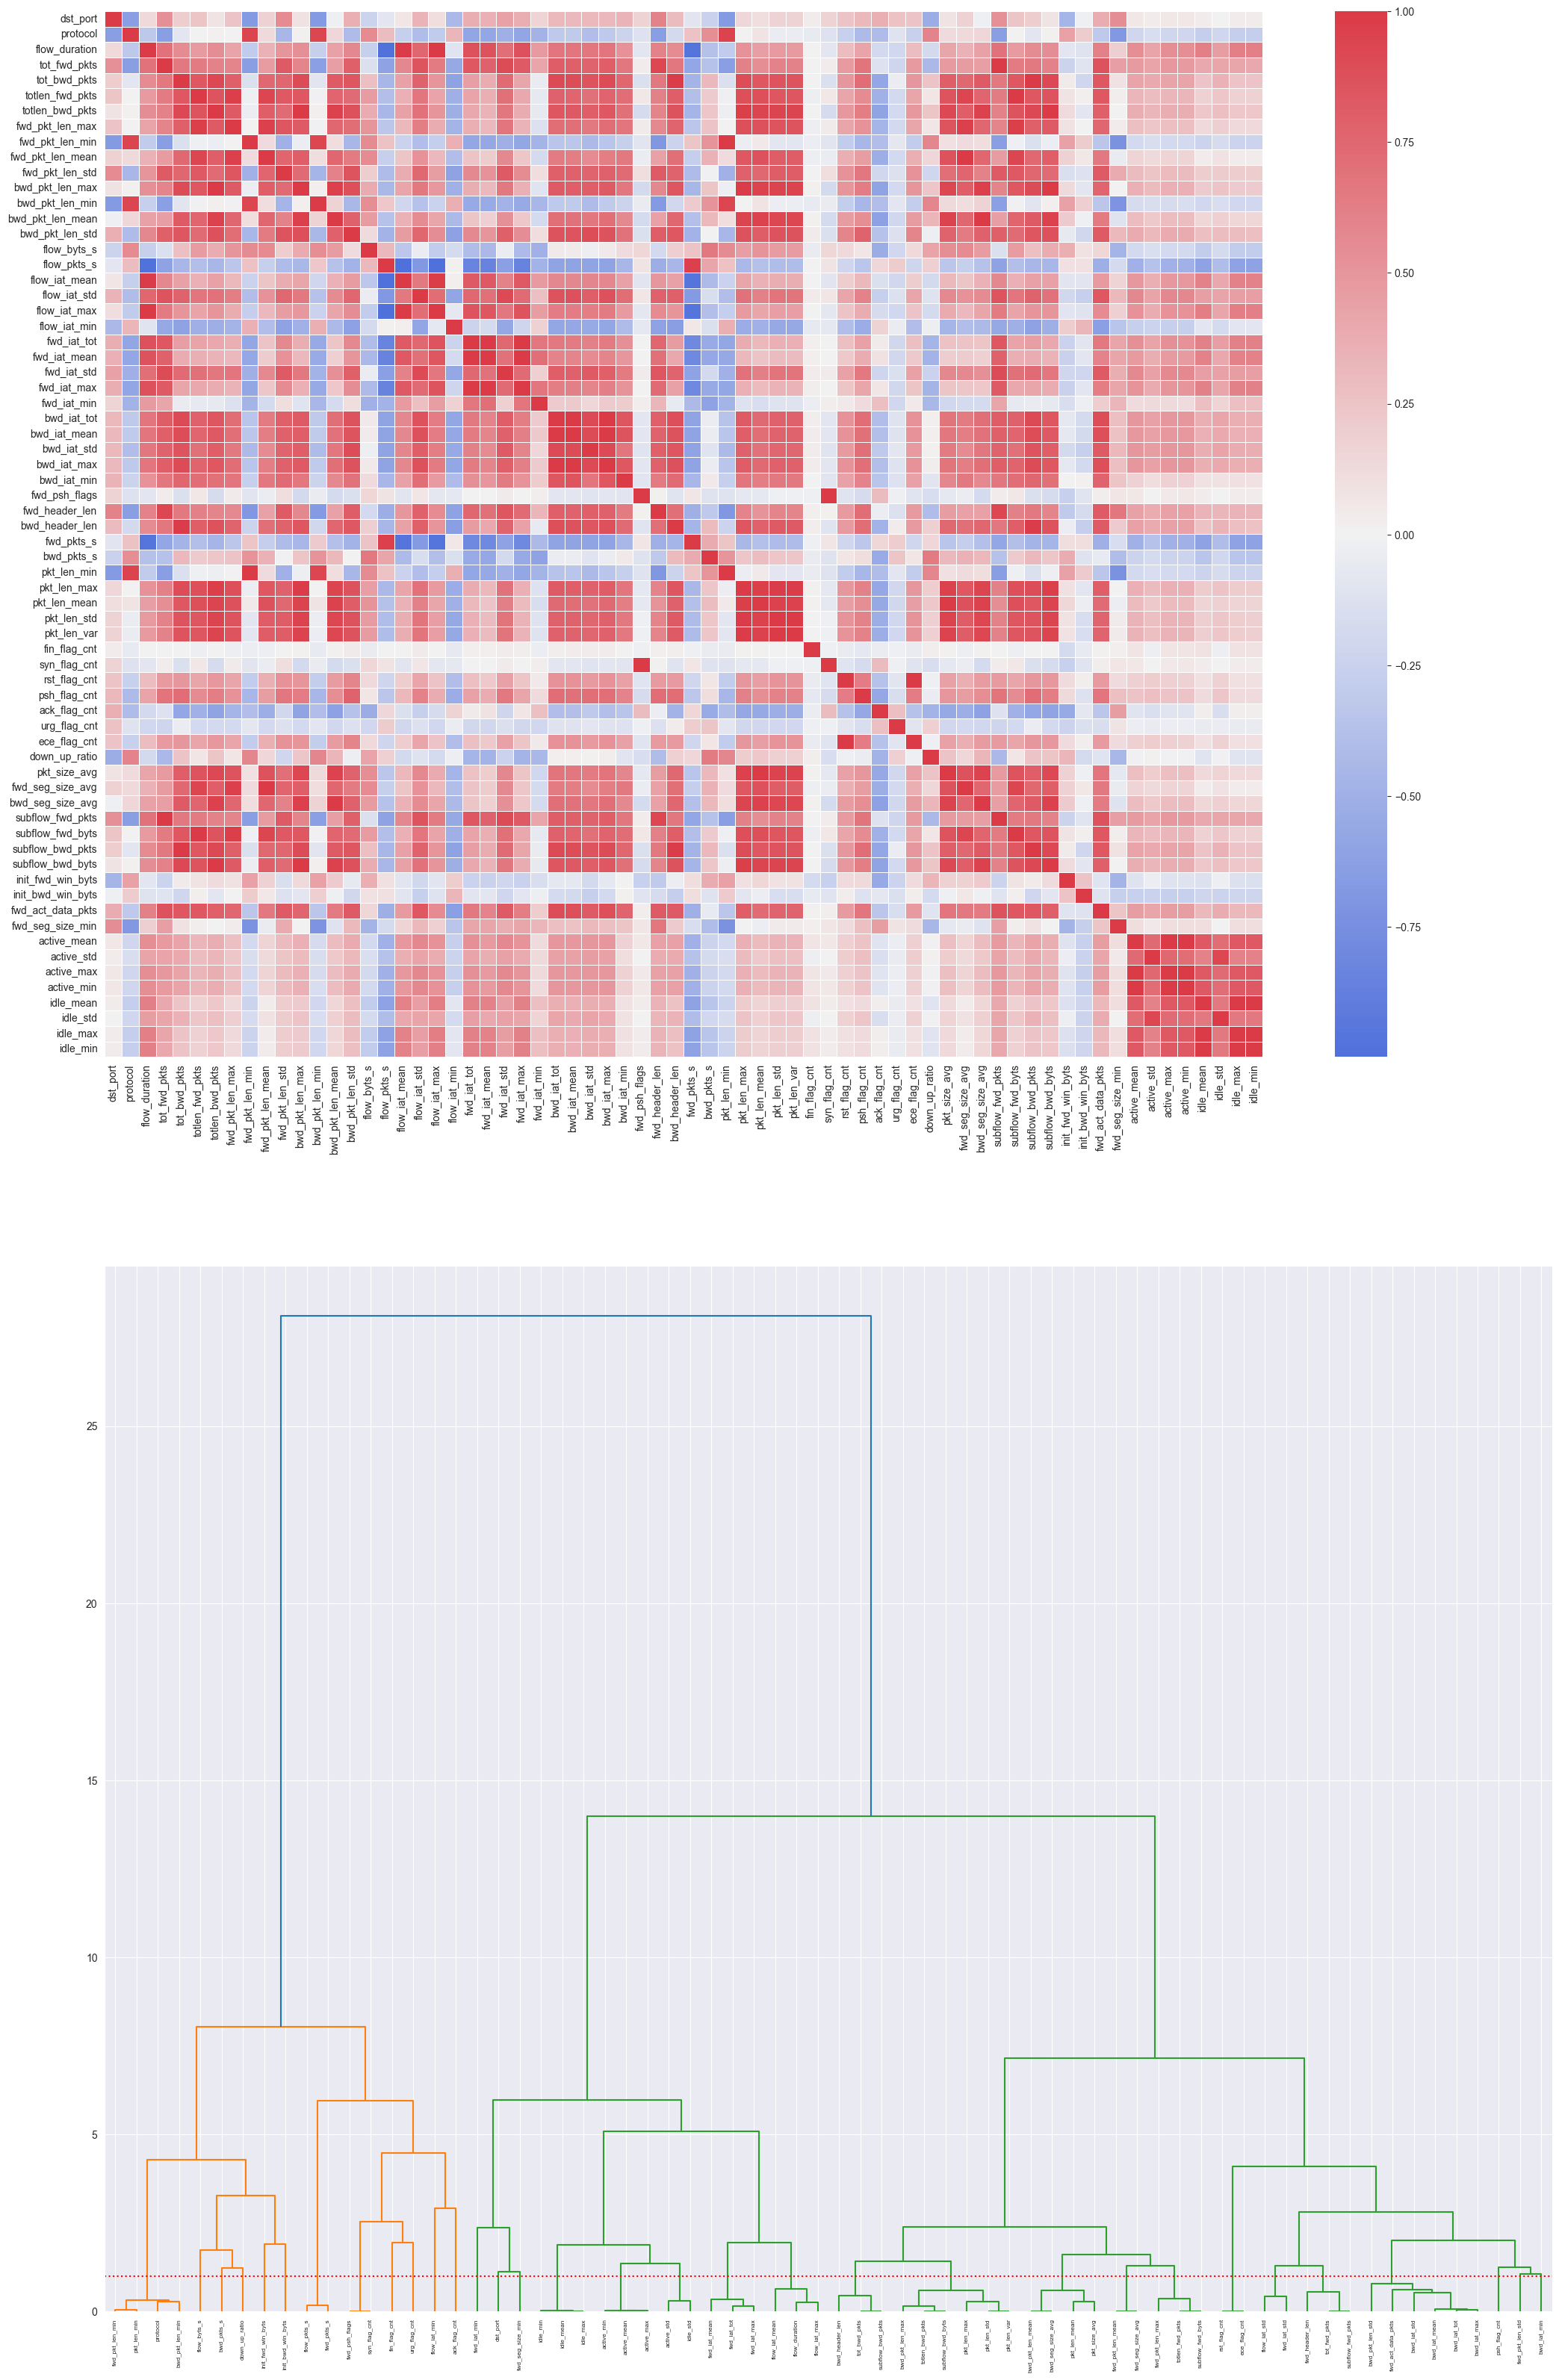

In [15]:
cluster_threshold = 1

corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 40))

sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True), ax=ax1)

dendro = hierarchy.dendrogram(corr_linkage, labels=X.columns, ax=ax2, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))
ax2.plot([0, 1000], [cluster_threshold, cluster_threshold], ':r')
plt.show()

In [16]:
cluster_ids = hierarchy.fcluster(corr_linkage, cluster_threshold, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

selected_features = X.columns[selected_features].tolist()

print('Selected features:')
pd.Series(selected_features)

Selected features:


0              dst_port
1              protocol
2         flow_duration
3          tot_fwd_pkts
4          tot_bwd_pkts
5       totlen_fwd_pkts
6       totlen_bwd_pkts
7      fwd_pkt_len_mean
8       fwd_pkt_len_std
9      bwd_pkt_len_mean
10      bwd_pkt_len_std
11          flow_byts_s
12          flow_pkts_s
13         flow_iat_std
14         flow_iat_min
15          fwd_iat_tot
16          fwd_iat_min
17          bwd_iat_min
18        fwd_psh_flags
19           bwd_pkts_s
20         fin_flag_cnt
21         rst_flag_cnt
22         psh_flag_cnt
23         ack_flag_cnt
24         urg_flag_cnt
25        down_up_ratio
26    init_fwd_win_byts
27    init_bwd_win_byts
28     fwd_seg_size_min
29          active_mean
30           active_std
31            idle_mean
dtype: object

In [17]:
X = X[selected_features]
print(f"Remaining amount of features: {len(X.columns)}")

Remaining amount of features: 32


<Axes: >

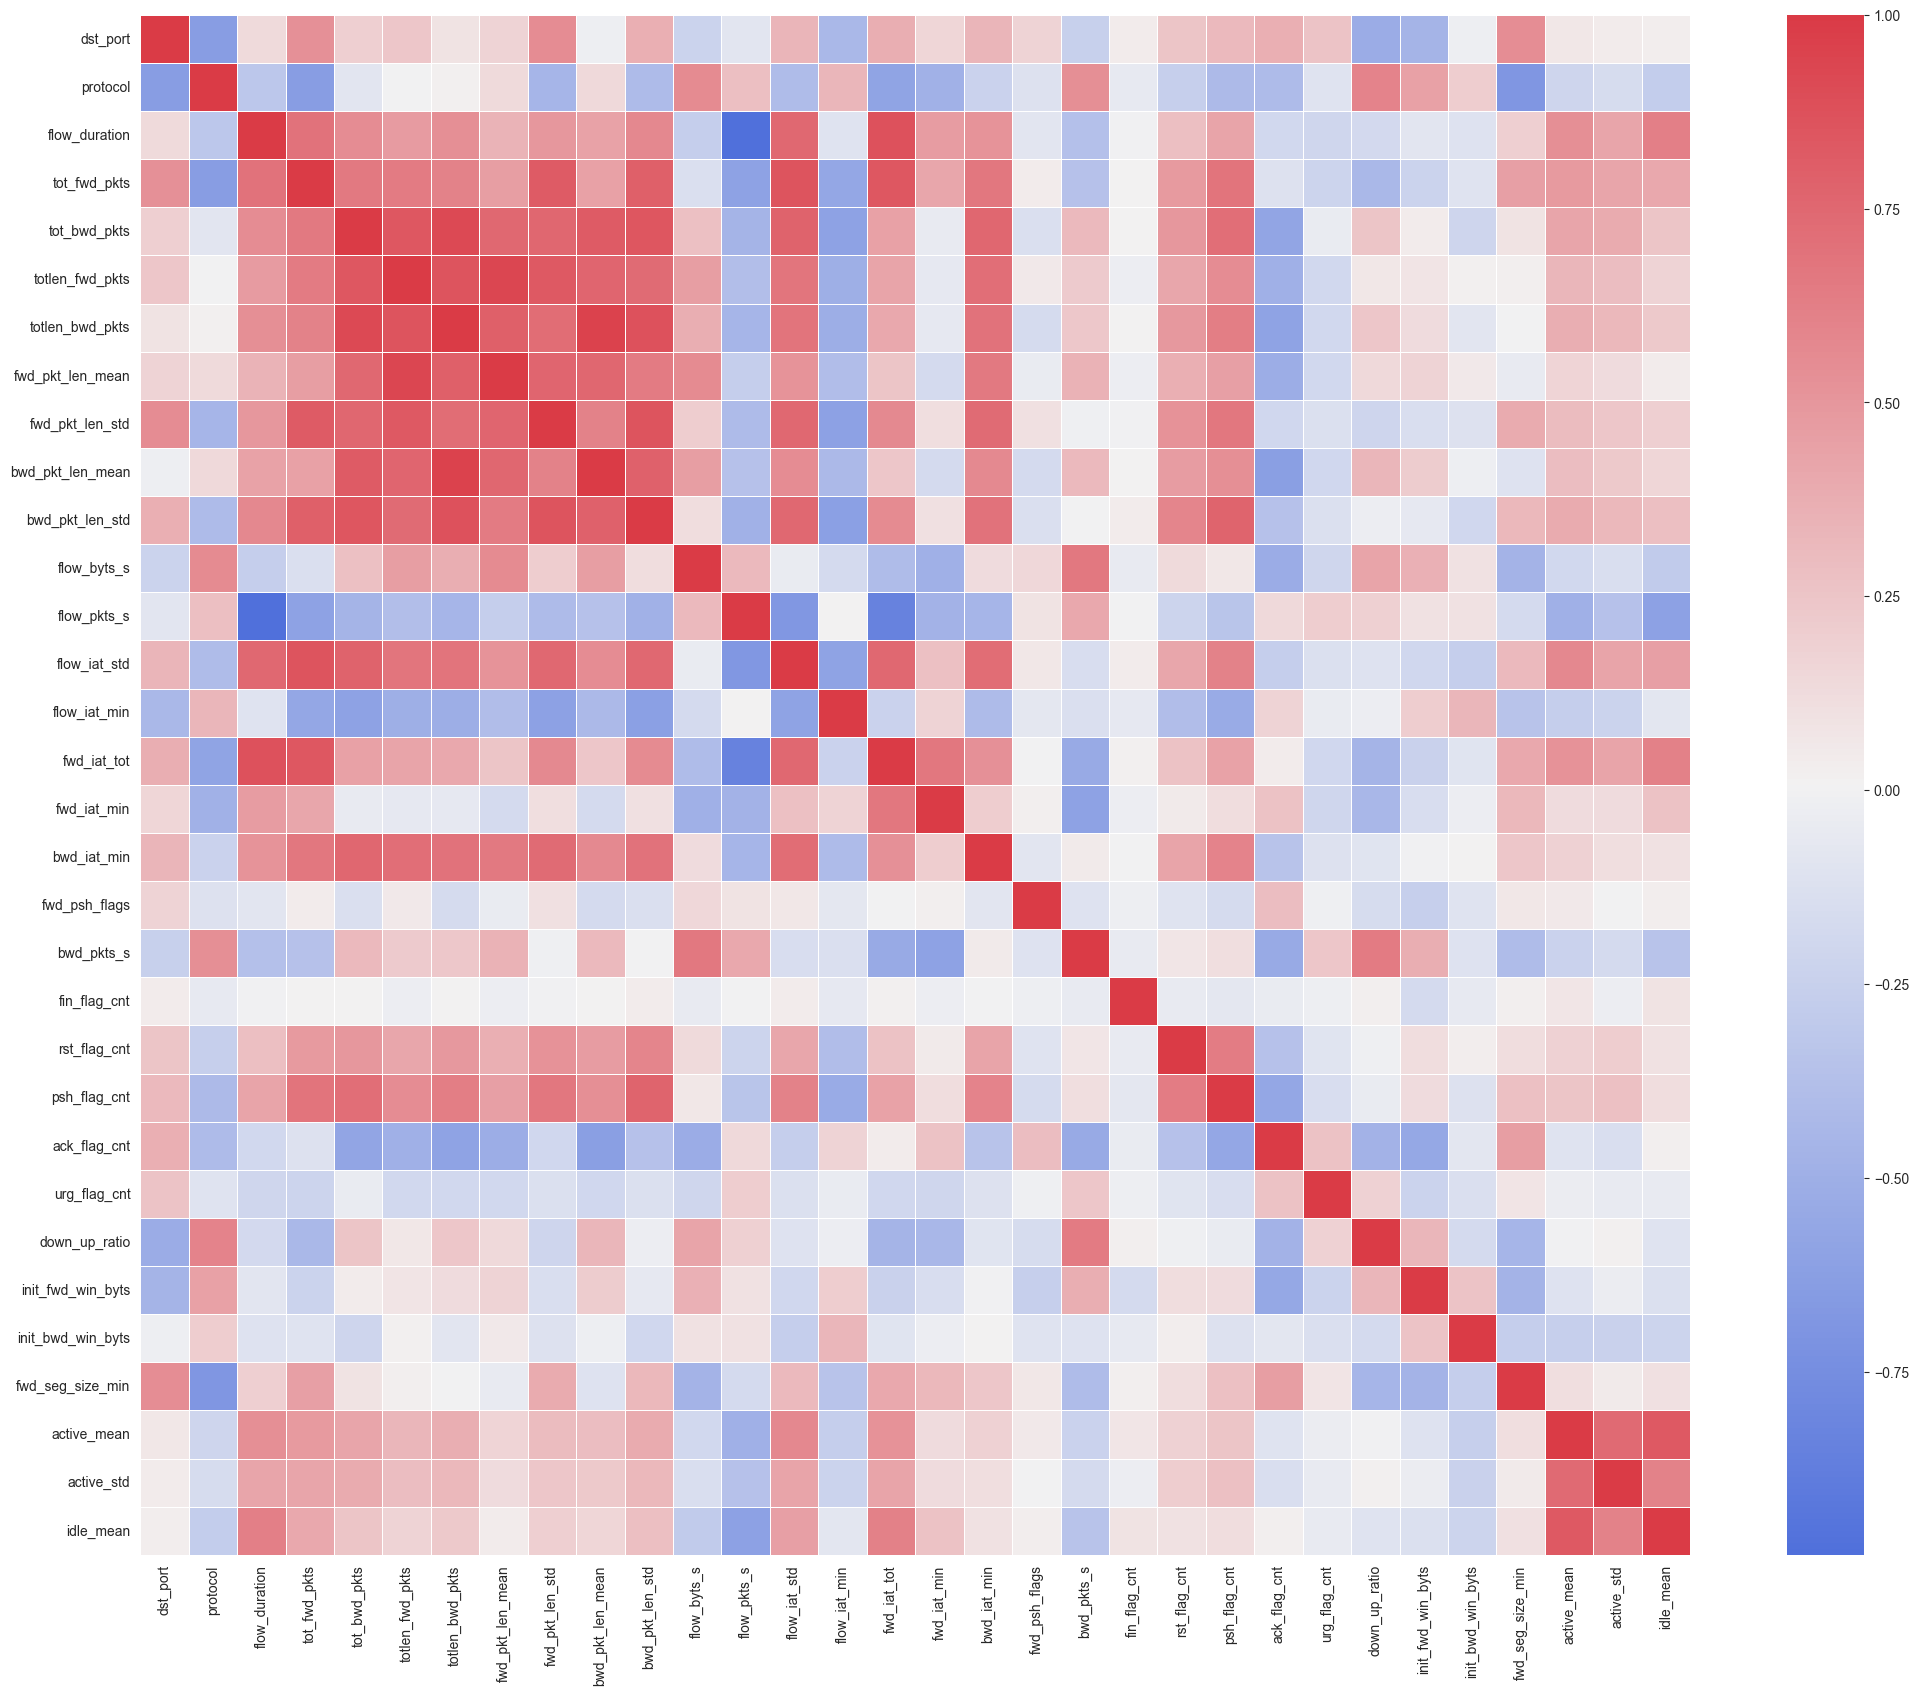

In [18]:
corr_updated = spearmanr(X).correlation
plt.figure(figsize=(25, 20))
sns.heatmap(corr_updated, xticklabels=X.columns, yticklabels=X.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))


In [19]:


from sklearn.model_selection import train_test_split


X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y.combined_label, test_size=0.2, stratify=y.combined_label
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, stratify=y_val_test
)




In [20]:
y_test.value_counts()

combined_label
Benign                       971399
DoS attacks-Hulk              69298
DDOS attack-HOIC              68601
DDOS attack-LOIC-UDP-HTTP     57792
DoS attacks-SlowHTTPTest      14539
DDOS LOIT                     12803
DoS attacks-GoldenEye          5180
DoS attacks-Slowloris          1679
Name: count, dtype: int64

In [21]:
y_train.value_counts()


combined_label
Benign                       7771190
DoS attacks-Hulk              554388
DDOS attack-HOIC              548809
DDOS attack-LOIC-UDP-HTTP     462337
DoS attacks-SlowHTTPTest      116311
DDOS LOIT                     102422
DoS attacks-GoldenEye          41441
DoS attacks-Slowloris          13429
Name: count, dtype: int64

In [22]:
y_val.value_counts()


combined_label
Benign                       971399
DoS attacks-Hulk              69299
DDOS attack-HOIC              68602
DDOS attack-LOIC-UDP-HTTP     57792
DoS attacks-SlowHTTPTest      14539
DDOS LOIT                     12802
DoS attacks-GoldenEye          5180
DoS attacks-Slowloris          1678
Name: count, dtype: int64

In [23]:
unique_classes = np.unique(y_train)
class_weights = {cls: len(y_train) / np.sum(y_train == cls) for cls in unique_classes}
print(f"Class weights: {class_weights}")

Class weights: {'Benign': 1.2366609232305477, 'DDOS LOIT': 93.83069067192595, 'DDOS attack-HOIC': 17.5112416159356, 'DDOS attack-LOIC-UDP-HTTP': 20.786411210869993, 'DoS attacks-GoldenEye': 231.90383919306967, 'DoS attacks-Hulk': 17.33501987777513, 'DoS attacks-SlowHTTPTest': 82.62612306660591, 'DoS attacks-Slowloris': 715.6398093677861}


In [28]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1330,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    task_type='GPU',
    verbose=100,
    random_seed=42,
    l2_leaf_reg=4,
    border_count=512,
    early_stopping_rounds=250,
    eval_metric='TotalF1',
    leaf_estimation_iterations=10,
    bagging_temperature=1.0,
    class_weights=list(class_weights.values()))



# Train the model
model.fit(X_train, y_train, eval_set=(X_val, y_val))


0:	learn: 0.8504422	test: 0.8483509	best: 0.8483509 (0)	total: 217ms	remaining: 4m 48s
100:	learn: 0.9996937	test: 0.9996640	best: 0.9996647 (99)	total: 21.9s	remaining: 4m 27s
200:	learn: 0.9999138	test: 0.9997595	best: 0.9997679 (189)	total: 44.9s	remaining: 4m 12s
300:	learn: 0.9999323	test: 0.9997778	best: 0.9997778 (299)	total: 1m 7s	remaining: 3m 49s
400:	learn: 0.9999411	test: 0.9997868	best: 0.9997868 (386)	total: 1m 28s	remaining: 3m 26s
500:	learn: 0.9999428	test: 0.9997874	best: 0.9997875 (485)	total: 1m 49s	remaining: 3m 1s
600:	learn: 0.9999469	test: 0.9997899	best: 0.9997900 (544)	total: 2m 10s	remaining: 2m 38s
700:	learn: 0.9999480	test: 0.9997918	best: 0.9997918 (684)	total: 2m 30s	remaining: 2m 14s
800:	learn: 0.9999483	test: 0.9997926	best: 0.9997927 (788)	total: 2m 49s	remaining: 1m 51s
900:	learn: 0.9999486	test: 0.9997924	best: 0.9997931 (835)	total: 3m 8s	remaining: 1m 29s
1000:	learn: 0.9999487	test: 0.9997926	best: 0.9997931 (835)	total: 3m 26s	remaining: 1m 7s

In [29]:
# Get the best score and iteration
best_score = model.get_best_score()
best_iteration = model.get_best_iteration()

# Extracting the best TotalF1 score
best_total_f1_score = best_score['validation']['TotalF1']

print(f"Best TotalF1 Score: {best_total_f1_score}")
print(f"Best Iteration: {best_iteration}")

Best TotalF1 Score: 0.9997930813590603
Best Iteration: 835


In [30]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9999217508497108
                           precision    recall  f1-score   support

                   Benign       1.00      1.00      1.00    971399
                DDOS LOIT       1.00      1.00      1.00     12803
         DDOS attack-HOIC       1.00      1.00      1.00     68601
DDOS attack-LOIC-UDP-HTTP       1.00      1.00      1.00     57792
    DoS attacks-GoldenEye       1.00      1.00      1.00      5180
         DoS attacks-Hulk       1.00      1.00      1.00     69298
 DoS attacks-SlowHTTPTest       1.00      1.00      1.00     14539
    DoS attacks-Slowloris       0.99      1.00      1.00      1679

                 accuracy                           1.00   1201291
                macro avg       1.00      1.00      1.00   1201291
             weighted avg       1.00      1.00      1.00   1201291



In [31]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_train)
print(accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))


0.9999312198221767
                           precision    recall  f1-score   support

                   Benign       1.00      1.00      1.00   7771190
                DDOS LOIT       1.00      1.00      1.00    102422
         DDOS attack-HOIC       1.00      1.00      1.00    548809
DDOS attack-LOIC-UDP-HTTP       1.00      1.00      1.00    462337
    DoS attacks-GoldenEye       1.00      1.00      1.00     41441
         DoS attacks-Hulk       1.00      1.00      1.00    554388
 DoS attacks-SlowHTTPTest       1.00      1.00      1.00    116311
    DoS attacks-Slowloris       0.99      1.00      1.00     13429

                 accuracy                           1.00   9610327
                macro avg       1.00      1.00      1.00   9610327
             weighted avg       1.00      1.00      1.00   9610327



In [32]:
target_names = ['Benign', 'DDOS LOIT','DDOS attack-HOIC', 'DDOS attack-LOIC-UDP-HTTP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris']


In [33]:
from prettytable import PrettyTable
from sklearn.metrics import precision_recall_fscore_support

def display_metrics_table(y_true, y_pred):
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred)

    # Create a table
    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-score", "Support"]

    for i, (p, r, f, s) in enumerate(zip(precision, recall, f1, support)):
        table.add_row([f"Class {i}", f"{p:.6f}", f"{r:.6f}", f"{f:.6f}", s])

    print(table)

    accuracy = (y_pred == y_true).sum() / len(y_true)
    print(f"\nOverall Accuracy: {accuracy:.6f}")

y_pred = model.predict(X_test).flatten()
display_metrics_table(y_test, y_pred)


+---------+-----------+----------+----------+---------+
|  Class  | Precision |  Recall  | F1-score | Support |
+---------+-----------+----------+----------+---------+
| Class 0 |  0.999999 | 0.999911 | 0.999955 |  971399 |
| Class 1 |  0.999454 | 0.999922 | 0.999688 |  12803  |
| Class 2 |  0.999956 | 1.000000 | 0.999978 |  68601  |
| Class 3 |  0.999792 | 1.000000 | 0.999896 |  57792  |
| Class 4 |  0.997688 | 0.999807 | 0.998747 |   5180  |
| Class 5 |  0.999423 | 0.999971 | 0.999697 |  69298  |
| Class 6 |  0.999656 | 0.999862 | 0.999759 |  14539  |
| Class 7 |  0.991721 | 0.998809 | 0.995252 |   1679  |
+---------+-----------+----------+----------+---------+

Overall Accuracy: 0.999922


In [10]:
import numpy as np

# Define the metrics for each class
precision = np.array([0.999999, 0.999454, 0.999956, 0.999792, 0.997688, 0.999423, 0.999656, 0.991721])
recall = np.array([0.999911, 0.999922, 1.000000, 1.000000, 0.999807, 0.999971, 0.999862, 0.998809])
f1_score = np.array([0.999955, 0.999688, 0.999978, 0.999896, 0.998747, 0.999697, 0.999759, 0.995252])
support = np.array([971399, 12803, 68601, 57792, 5180, 69298, 14539, 1679])

# Calculate the total number of instances
total_support = np.sum(support)

# Calculate weighted metrics
weighted_precision = np.sum(precision * support) / total_support
weighted_recall = np.sum(recall * support) / total_support
weighted_f1_score = np.sum(f1_score * support) / total_support

# Display the results
print(f"Overall Precision: {weighted_precision:.6f}")
print(f"Overall Recall: {weighted_recall:.6f}")
print(f"Overall F1-Score: {weighted_f1_score:.6f}")


Overall Precision: 0.999922
Overall Recall: 0.999921
Overall F1-Score: 0.999922


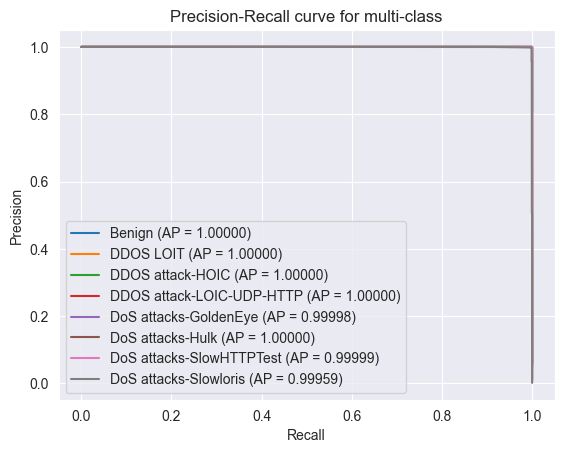

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_multi_class_pr_auc(y_true, y_score, class_labels):
    # Initialize an array to store average precision values
    average_precisions = []

    # Map class labels to indices
    label_to_index = {label: index for index, label in enumerate(class_labels)}

    # For each class label
    for label in class_labels:
        # Get the index of the current class
        class_index = label_to_index[label]

        # Convert to binary: 1 for the current class, 0 for others
        y_true_binary = (y_true == label).astype(int)

        # Check if there are any positive instances for the class
        if np.sum(y_true_binary) == 0:
            print(f"Skipping Class {label}, no positive instances in y_true")
            continue

        precision, recall, _ = precision_recall_curve(y_true_binary, y_score[:, class_index])
        average_precision = average_precision_score(y_true_binary, y_score[:, class_index])
        average_precisions.append(average_precision)
        plt.plot(recall, precision, label=f'{label} (AP = {average_precision:.5f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve for multi-class')
    plt.legend(loc="best")
    plt.show()

class_labels = ['Benign', 'DDOS LOIT','DDOS attack-HOIC', 'DDOS attack-LOIC-UDP-HTTP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris']
n_classes = len(class_labels)
y_score = model.predict_proba(X_test)

plot_multi_class_pr_auc(y_test, y_score, class_labels)


In [35]:
from sklearn.metrics import matthews_corrcoef

def multi_class_mcc(y_true, y_pred, class_labels):
    mcc_scores = []

    # Map class labels to indices
    label_to_index = {label: index for index, label in enumerate(class_labels)}

    for label in class_labels:
        class_index = label_to_index[label]

        binary_true = np.where(y_true == label, 1, 0)
        binary_pred = np.where(y_pred == label, 1, 0)

        mcc = matthews_corrcoef(binary_true, binary_pred)
        mcc_scores.append(mcc)
        print(f"{label} MCC: {mcc:.6f}")

    avg_mcc = np.mean(mcc_scores)
    print(f"Average MCC: {avg_mcc:.6f}")

class_labels = [ 'Benign', 'DDOS LOIT','DDOS attack-HOIC', 'DDOS attack-LOIC-UDP-HTTP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris']
y_pred = model.predict(X_test).flatten()

multi_class_mcc(y_test, y_pred, class_labels)


Benign MCC: 0.999766
DDOS LOIT MCC: 0.999684
DDOS attack-HOIC MCC: 0.999977
DDOS attack-LOIC-UDP-HTTP MCC: 0.999891
DoS attacks-GoldenEye MCC: 0.998742
DoS attacks-Hulk MCC: 0.999679
DoS attacks-SlowHTTPTest MCC: 0.999756
DoS attacks-Slowloris MCC: 0.995252
Average MCC: 0.999093


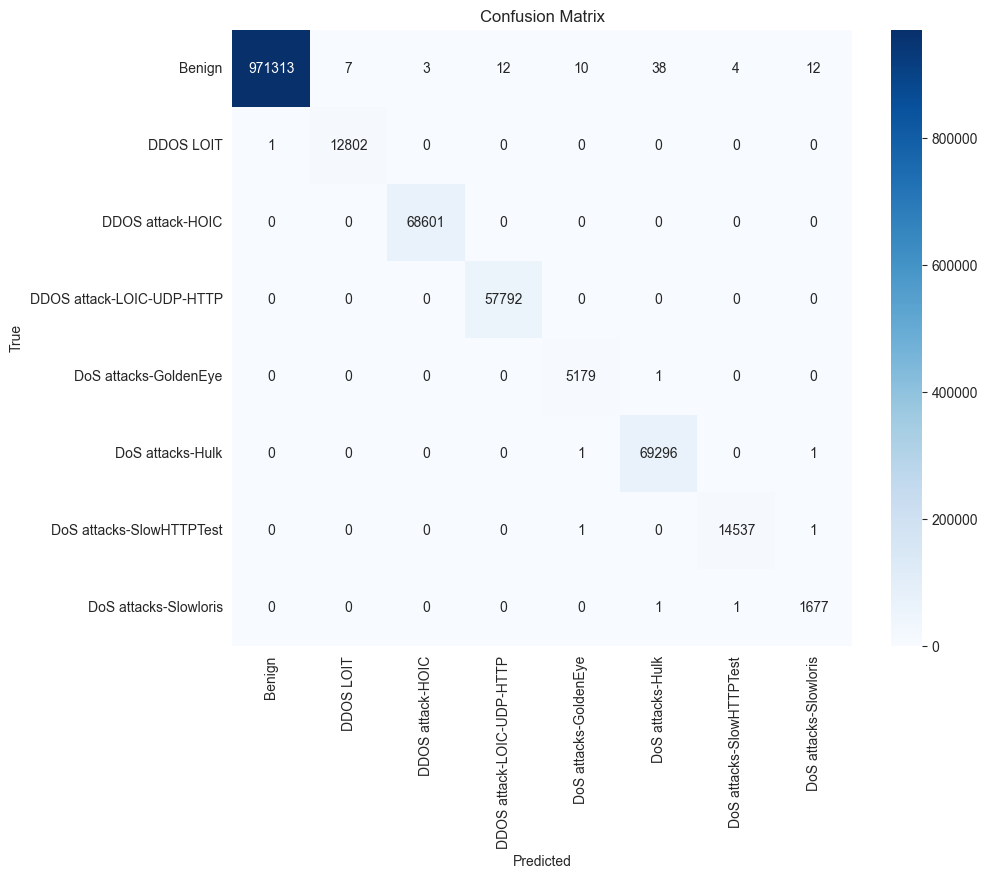

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Define the order of class labels based on your y_test distribution
selected_classes1 = [
  'Benign', 'DDOS LOIT','DDOS attack-HOIC', 'DDOS attack-LOIC-UDP-HTTP', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-Slowloris'
]

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=selected_classes1)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes1, yticklabels=selected_classes1)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


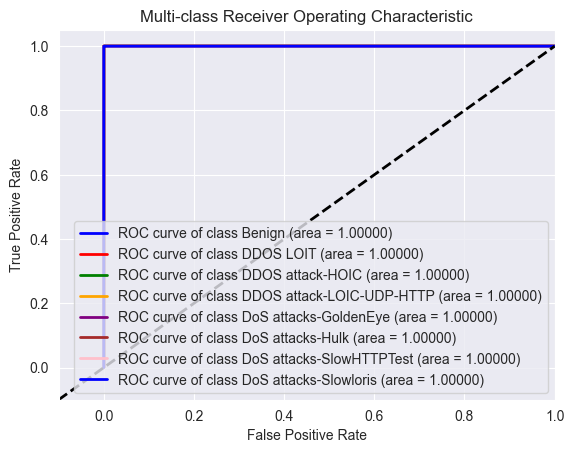

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from numpy import interp
from itertools import cycle

# Identify present classes
classes_present = np.unique(y_test)
n_classes = len(classes_present)

# Binarize the output for present classes
y_test_bin = label_binarize(y_test, classes=classes_present)
y_probs = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each present class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes_present):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
lw = 2
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:.5f})'.format(classes_present[i], roc_auc[i]))

plt.plot([-0.1, 1], [-0.1, 1], 'k--', lw=lw)
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [64]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Number of folds
n_splits = 10

# Setting up Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Arrays to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Classes for ROC AUC
classes = np.unique(y)
n_classes = len(classes)

# Assuming X_val and y_val are defined and are separate validation sets
# Cross-validation
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Create a new instance of the model for each fold
    modell = CatBoostClassifier(
        # your parameters

        iterations=836,                 # Adjusted to prevent overfitting and speed up training
        learning_rate=0.1,               # Lowered to make the model more robust and prevent overfitting
        depth=4,                         # Kept the same to capture complex patterns in the data
        loss_function='MultiClass',      # Suitable for multi-class classification tasks
        task_type='GPU',                 # Utilize GPU for faster training
        verbose=100,                     # Adjusted for more frequent logging to monitor progress
        random_seed=42,                  # Ensures reproducibility
        l2_leaf_reg=4,                   # Adjusted based on cross-validation or domain knowledge
        border_count=512,                # Kept the same to balance training speed and model accuracy
        early_stopping_rounds=250,       # Increased to give the model more room to improve before stopping
        eval_metric='TotalF1',           # Adjusted for a more suitable metric for imbalanced datasets
        leaf_estimation_iterations=10,   # Kept the same for accurate leaf value estimation
        bagging_temperature=1.0,         # Kept the same to control randomness in bagging
        class_weights=list(class_weights.values()),
    )

    modell.fit(X_train_fold, y_train_fold, eval_set=(X_val, y_val), verbose=True)

    # Predict and evaluate
    predictions = modell.predict(X_test_fold)
    probas = modell.predict_proba(X_test_fold)

    accuracy = accuracy_score(y_test_fold, predictions)
    accuracy_scores.append(accuracy)

    # Calculate the metrics
    precision = precision_score(y_test_fold, predictions, average='weighted', labels=np.unique(predictions))
    recall = recall_score(y_test_fold, predictions, average='weighted', labels=np.unique(predictions))
    f1 = f1_score(y_test_fold, predictions, average='weighted', labels=np.unique(predictions))

    # Binarize the output for ROC AUC
    y_test_binarized = label_binarize(y_test_fold, classes=classes)
    roc_auc = roc_auc_score(y_test_binarized, probas, multi_class='ovr')
    roc_auc_scores.append(roc_auc)

    # Append the scores
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)




0:	learn: 0.5918665	test: 0.5913462	best: 0.5913462 (0)	total: 209ms	remaining: 2m 54s
1:	learn: 0.7018870	test: 0.7013363	best: 0.7013363 (1)	total: 465ms	remaining: 3m 13s
2:	learn: 0.8829678	test: 0.8820134	best: 0.8820134 (2)	total: 702ms	remaining: 3m 15s
3:	learn: 0.9503008	test: 0.9499908	best: 0.9499908 (3)	total: 974ms	remaining: 3m 22s
4:	learn: 0.9550421	test: 0.9553739	best: 0.9553739 (4)	total: 1.24s	remaining: 3m 25s
5:	learn: 0.9682259	test: 0.9689838	best: 0.9689838 (5)	total: 1.51s	remaining: 3m 28s
6:	learn: 0.9779479	test: 0.9785698	best: 0.9785698 (6)	total: 1.76s	remaining: 3m 28s
7:	learn: 0.9796750	test: 0.9797037	best: 0.9797037 (7)	total: 2.03s	remaining: 3m 30s
8:	learn: 0.9835324	test: 0.9837211	best: 0.9837211 (8)	total: 2.29s	remaining: 3m 30s
9:	learn: 0.9838827	test: 0.9841213	best: 0.9841213 (9)	total: 2.56s	remaining: 3m 31s
10:	learn: 0.9839236	test: 0.9839756	best: 0.9841213 (9)	total: 2.8s	remaining: 3m 29s
11:	learn: 0.9852177	test: 0.9851754	best: 

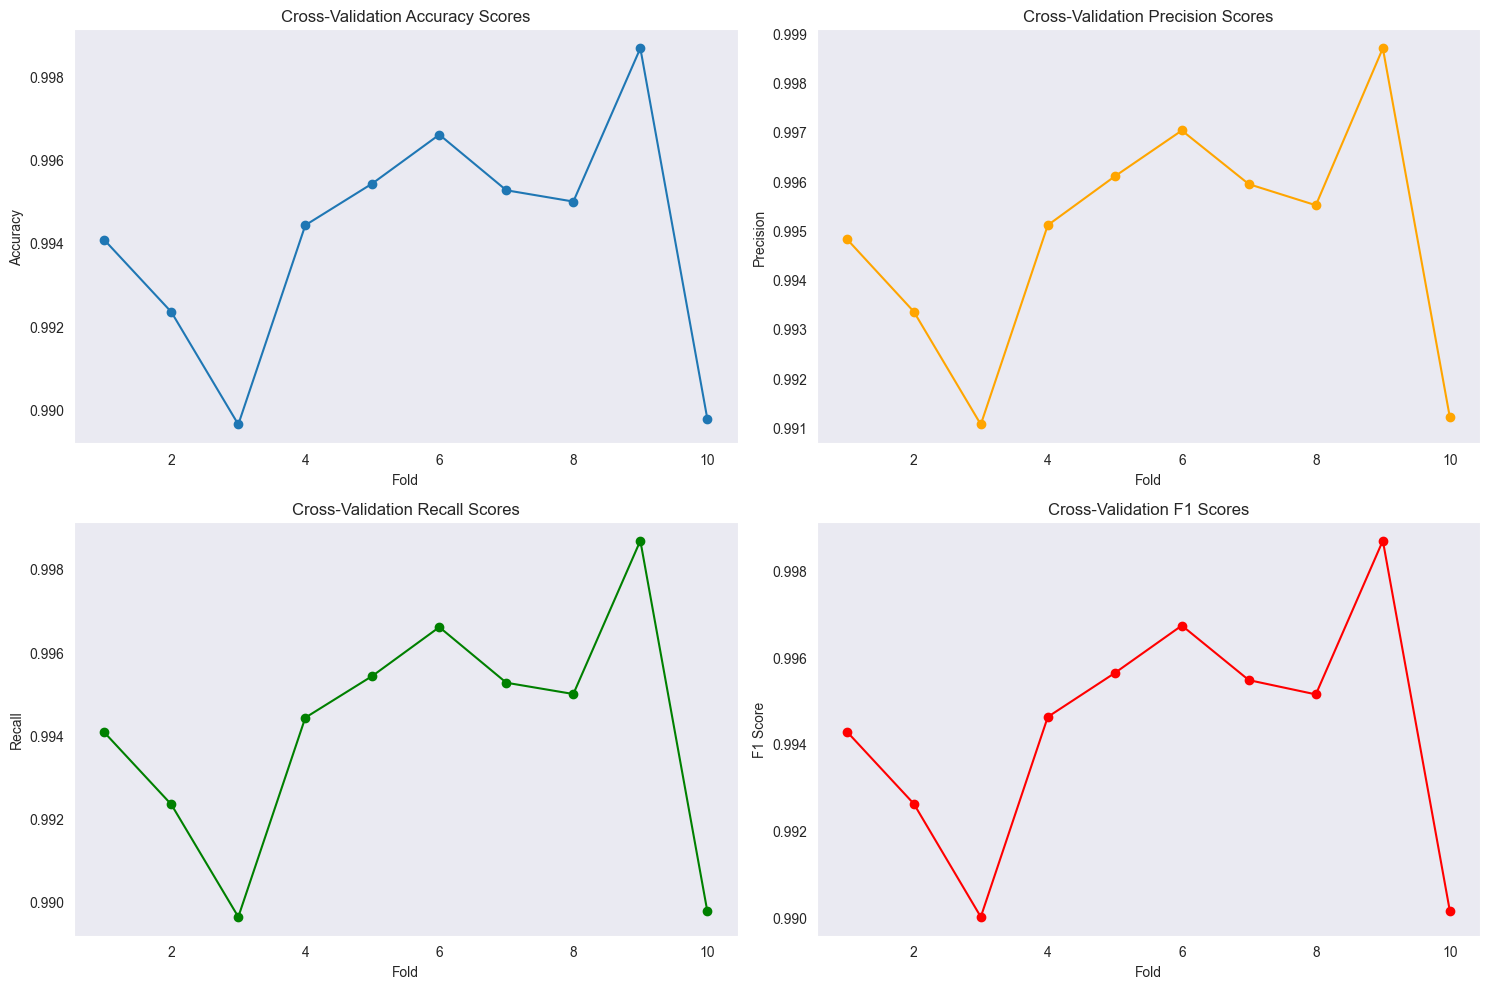

In [65]:
# Plotting the results for all metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Accuracy
axs[0, 0].plot(range(1, n_splits + 1), accuracy_scores, marker='o')
axs[0, 0].set_title('Cross-Validation Accuracy Scores')
axs[0, 0].set_xlabel('Fold')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid()

# Plot Precision
axs[0, 1].plot(range(1, n_splits + 1), precision_scores, marker='o', color='orange')
axs[0, 1].set_title('Cross-Validation Precision Scores')
axs[0, 1].set_xlabel('Fold')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid()

# Plot Recall
axs[1, 0].plot(range(1, n_splits + 1), recall_scores, marker='o', color='green')
axs[1, 0].set_title('Cross-Validation Recall Scores')
axs[1, 0].set_xlabel('Fold')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid()

# Plot F1 Score
axs[1, 1].plot(range(1, n_splits + 1), f1_scores, marker='o', color='red')
axs[1, 1].set_title('Cross-Validation F1 Scores')
axs[1, 1].set_xlabel('Fold')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid()

plt.tight_layout()
plt.show()

In [66]:
import pandas as pd

# Create a DataFrame to hold the scores
cv_results = pd.DataFrame({
    'Fold': range(1, n_splits + 1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

# Display the results table
print(cv_results)


# Cross-validation

   Fold  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     1  0.994072   0.994826  0.994072  0.994283  0.999915
1     2  0.992342   0.993351  0.992342  0.992620  0.999929
2     3  0.989641   0.991059  0.989641  0.990012  0.999912
3     4  0.994425   0.995107  0.994425  0.994621  0.999938
4     5  0.995427   0.996099  0.995427  0.995633  0.999974
5     6  0.996599   0.997030  0.996599  0.996726  0.999989
6     7  0.995264   0.995940  0.995264  0.995468  0.999963
7     8  0.994993   0.995512  0.994993  0.995139  0.999949
8     9  0.998675   0.998701  0.998675  0.998681  0.999999
9    10  0.989773   0.991204  0.989773  0.990149  0.999884


In [67]:
model.save_model("catboost_model_dos_ddos_new1.pkl")


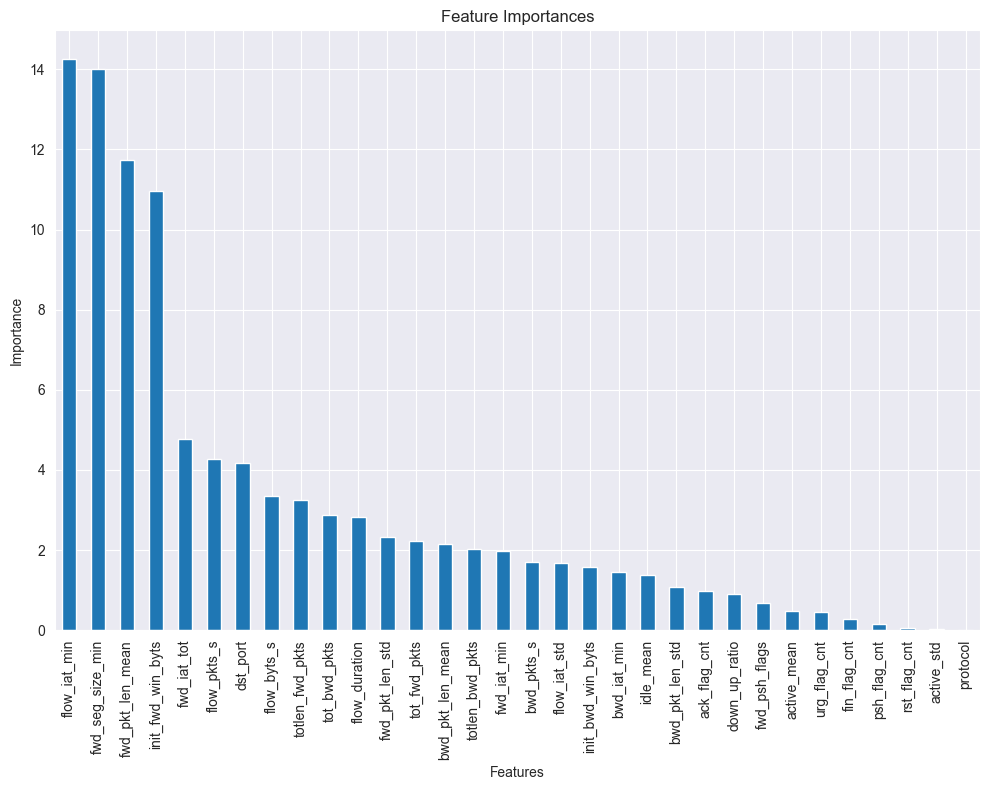

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'model' is your trained CatBoostClassifier
# And 'X_train' is the DataFrame of training data used to fit the model

# Get feature importances
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

# Create a pandas Series to view and sort the importances along with their corresponding feature names
feature_importances_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
feature_importances_series.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()  # Adjust layout to fit all feature names
plt.show()


In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'model' is your trained CatBoostClassifier
# And 'X_train' is the DataFrame of training data used to fit the model

# Get feature importances
feature_importances = model.get_feature_importance()
feature_names = X_train.columns

# Create a pandas Series to view and sort the importances along with their corresponding feature names
feature_importances_series = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

# Convert the Series into a DataFrame
feature_importances_df = feature_importances_series.reset_index()
feature_importances_df.columns = ['Feature', 'Importance']

# Display the feature importances as a table
print(feature_importances_df)


              Feature  Importance
0        flow_iat_min   14.256145
1    fwd_seg_size_min   13.998470
2    fwd_pkt_len_mean   11.729543
3   init_fwd_win_byts   10.959764
4         fwd_iat_tot    4.783144
5         flow_pkts_s    4.273709
6            dst_port    4.162378
7         flow_byts_s    3.348249
8     totlen_fwd_pkts    3.240947
9        tot_bwd_pkts    2.887474
10      flow_duration    2.828587
11    fwd_pkt_len_std    2.316755
12       tot_fwd_pkts    2.230550
13   bwd_pkt_len_mean    2.154935
14    totlen_bwd_pkts    2.037068
15        fwd_iat_min    1.977382
16         bwd_pkts_s    1.705630
17       flow_iat_std    1.677025
18  init_bwd_win_byts    1.566845
19        bwd_iat_min    1.453220
20          idle_mean    1.385364
21    bwd_pkt_len_std    1.071683
22       ack_flag_cnt    0.976582
23      down_up_ratio    0.892718
24      fwd_psh_flags    0.667458
25        active_mean    0.484459
26       urg_flag_cnt    0.446505
27       fin_flag_cnt    0.267701
28       psh_f

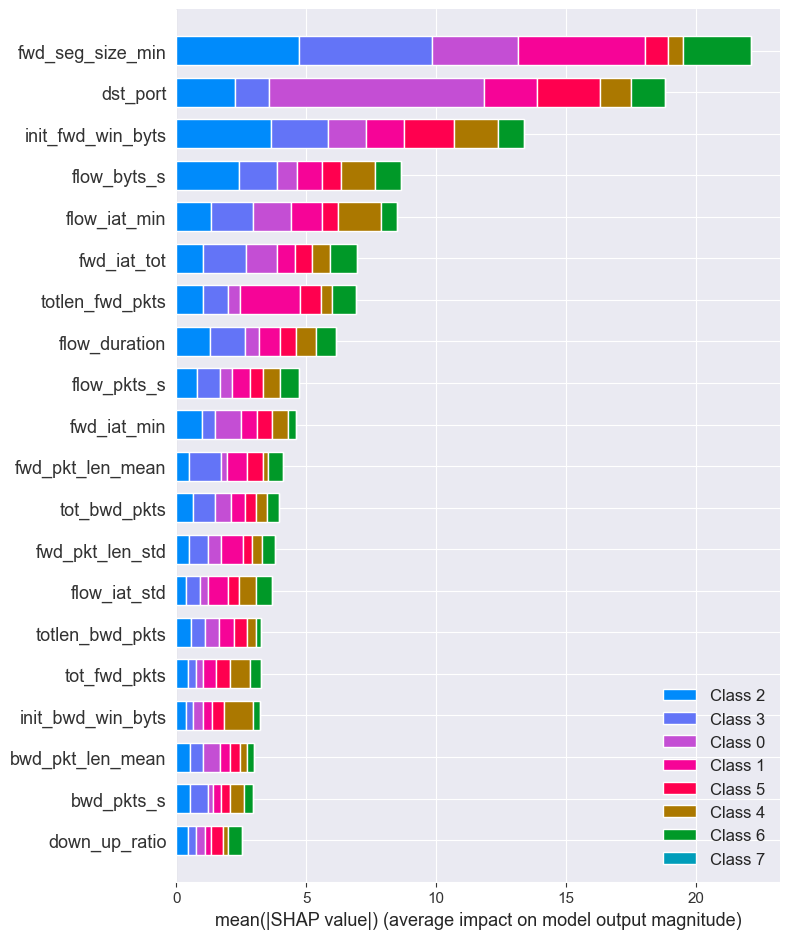

Class 0 SHAP Value Summary:
                   Mean SHAP Value Class 0
dst_port                          8.280043
fwd_seg_size_min                  3.274403
flow_iat_min                      1.446625
init_fwd_win_byts                 1.442469
fwd_iat_tot                       1.199390
fwd_iat_min                       0.985345
flow_byts_s                       0.770695
bwd_pkt_len_mean                  0.646320
tot_bwd_pkts                      0.622890
totlen_bwd_pkts                   0.570545
flow_duration                     0.546479
fwd_pkt_len_std                   0.488599
flow_pkts_s                       0.466214
totlen_fwd_pkts                   0.439071
init_bwd_win_byts                 0.375118
down_up_ratio                     0.345004
idle_mean                         0.322903
tot_fwd_pkts                      0.288339
flow_iat_std                      0.287205
fwd_pkt_len_mean                  0.224585
ack_flag_cnt                      0.191649
bwd_pkts_s                

In [71]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

import shap
import pandas as pd

# Number of classes
num_classes = len(shap_values)

# Process each class's SHAP values separately
for i in range(num_classes):
    # Convert to DataFrame
    shap_df = pd.DataFrame(shap_values[i], columns=X_test.columns)

    # Summarize SHAP values for each feature
    shap_summary = shap_df.abs().mean().sort_values(ascending=False)

    # Convert summary to DataFrame
    shap_summary_df = pd.DataFrame(shap_summary, columns=[f'Mean SHAP Value Class {i}'])

    # Display the DataFrame
    print(f'Class {i} SHAP Value Summary:')
    print(shap_summary_df)
    print('\n')


In [79]:
import matplotlib.pyplot as plt
import time
import numpy as np


In [ ]:
######## Some experiments

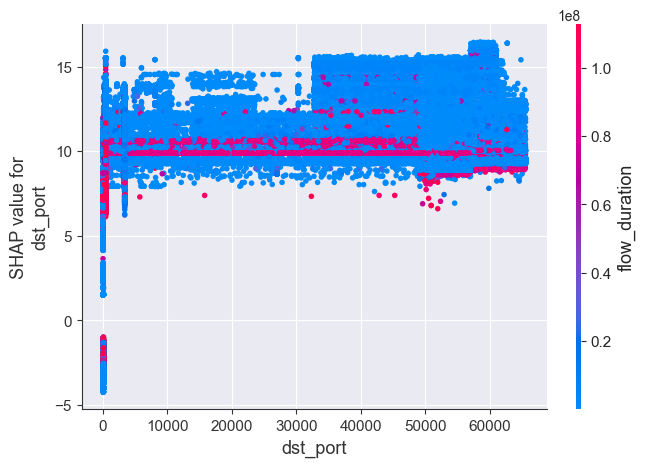

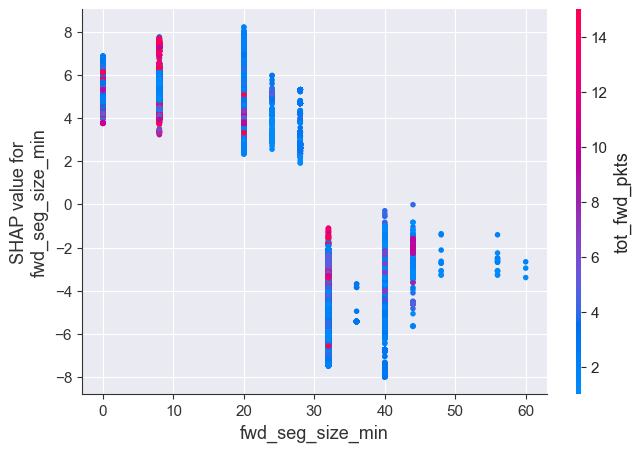

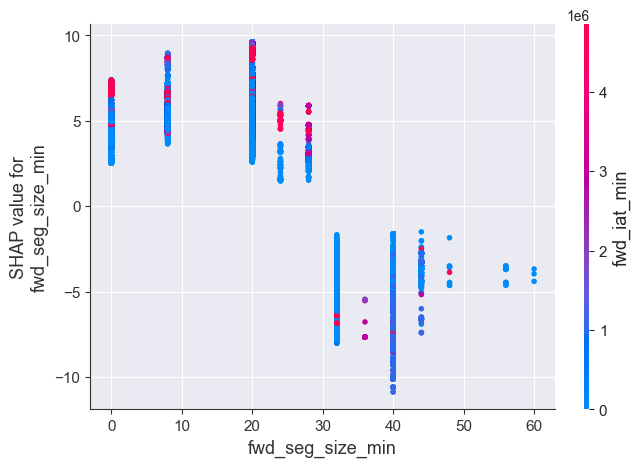

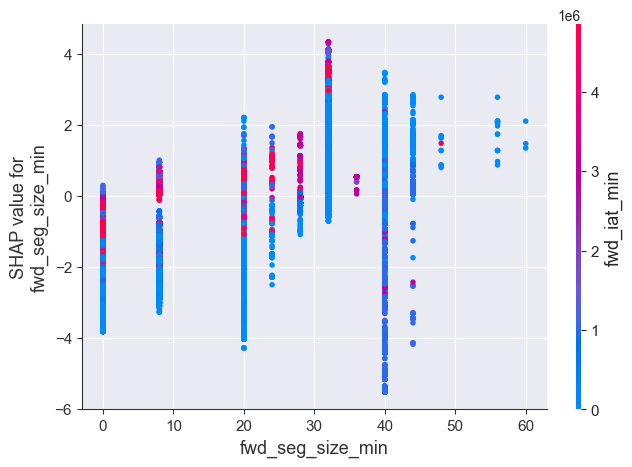

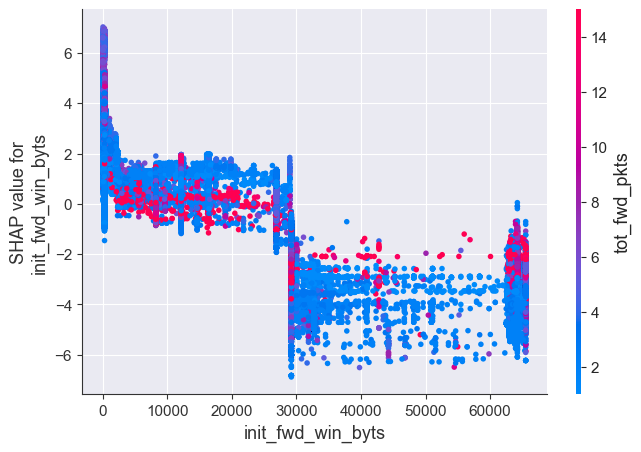

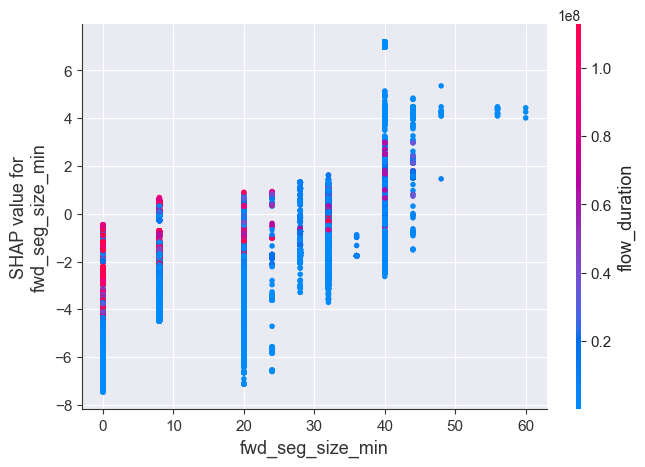

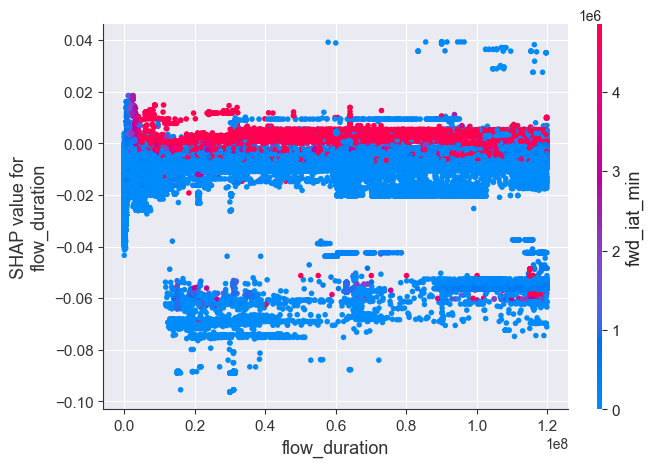

In [48]:
shap.dependence_plot('dst_port', shap_values[0], X_test)
shap.dependence_plot('fwd_seg_size_min', shap_values[1], X_test)
shap.dependence_plot('fwd_seg_size_min', shap_values[2], X_test)
shap.dependence_plot('fwd_seg_size_min', shap_values[3], X_test)
shap.dependence_plot('init_fwd_win_byts', shap_values[4], X_test)
shap.dependence_plot('fwd_seg_size_min', shap_values[5], X_test)
shap.dependence_plot('flow_duration', shap_values[6], X_test)


In [2]:
print("b")

b


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import shap
import scikitplot as skplt
from mistune.plugins.math import math
from pyspark.sql.functions import avg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score
from catboost import CatBoostClassifier
from catboost import Pool

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict

from scipy.stats import ks_2samp
from scipy.stats import describe
from imblearn.over_sampling import SMOTENC
from collections import Counter
from IPython.display import display

%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
dataset_base_path = r'E:\AWS\processed\dosdb\DOS-DDOS-BENIGN'

types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}


def replace_infinity_with_mean(df):
    inf_columns = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
    for col in inf_columns:
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df


def replace_negative_values_with_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.values

    columns = [c for c in numeric_cols if df[df[c] < 0][c].count() > 0]
    for col in columns:
        mask = df[col] < 0
        df.loc[mask, col] = np.nan
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
    return df


def load_dataset(files, dtypes, cols=None):
    df = pd.concat((pd.read_csv(f, dtype=dtypes, usecols=cols) for f in files))

    df = replace_infinity_with_mean(df)
    df = replace_negative_values_with_mean(df)

    return df


csv_files = glob.glob(os.path.join(dataset_base_path, '*.csv'))

df = load_dataset(csv_files, types)
df

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,6,7/7/2017 3:30,3.0,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,55054,6,7/7/2017 3:30,109.0,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,55055,6,7/7/2017 3:30,52.0,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,46236,6,7/7/2017 3:30,34.0,1,1,6,6,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,54863,6,7/7/2017 3:30,3.0,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
1048570,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
1048571,21,6,16/02/2018 10:36:33,3.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest
1048572,21,6,16/02/2018 10:36:33,5.0,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS attacks-SlowHTTPTest


In [3]:
X = df.drop(columns=['label'])
# List of selected classes
selected_classes = [
    'Benign',
    'DDOS LOIT',
    'DoS attacks-Hulk',
    'DDOS attack-HOIC',
    'DDoS attacks-LOIC-HTTP',
    'DoS attacks-SlowHTTPTest',
    'DoS attacks-GoldenEye',
    'DoS attacks-Slowloris',
    'DDOS attack-LOIC-UDP'
]

# Filter the dataframe
filtered_df = df[df['label'].isin(selected_classes)]

# Now, you can proceed with your analysis on the filtered_df
# Create a new column 'combined_label' to store the combined class labels
filtered_df['combined_label'] = filtered_df['label']

# Combine 'FTP-BruteForce' and 'DoS attacks-SlowHTTPTest' into one class
filtered_df.loc[filtered_df['label'].isin(
    ['DDOS attack-LOIC-UDP', 'DDoS attacks-LOIC-HTTP']), 'combined_label'] = 'DDOS attack-LOIC-UDP-HTTP'

# Display the first few rows of the DataFrame to verify the changes
print(filtered_df.head())

X1 = filtered_df.drop(columns=['label', 'combined_label'])
y1 = filtered_df[['combined_label']]
X1
y1
y1.combined_label.value_counts()
X = X1
y = y1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   dst_port  protocol      timestamp  flow_duration  tot_fwd_pkts  \
0     54865         6  7/7/2017 3:30            3.0             2   
1     55054         6  7/7/2017 3:30          109.0             1   
2     55055         6  7/7/2017 3:30           52.0             1   
3     46236         6  7/7/2017 3:30           34.0             1   
4     54863         6  7/7/2017 3:30            3.0             2   

   tot_bwd_pkts  totlen_fwd_pkts  totlen_bwd_pkts  fwd_pkt_len_max  \
0             0               12                0                6   
1             1                6                6                6   
2             1                6                6                6   
3             1                6                6                6   
4             0               12                0                6   

   fwd_pkt_len_min  ...  active_mean  active_std  active_max  active_min  \
0                6  ...          0.0         0.0           0           0   
1           

In [4]:
selected_features = [
    "dst_port",
    "protocol",
    "flow_duration",
    "tot_fwd_pkts",
    "tot_bwd_pkts",
    "totlen_fwd_pkts",
    "totlen_bwd_pkts",
    "fwd_pkt_len_mean",
    "fwd_pkt_len_std",
    "bwd_pkt_len_mean",
    "bwd_pkt_len_std",
    "flow_byts_s",
    "flow_pkts_s",
    "flow_iat_std",
    "flow_iat_min",
    "fwd_iat_tot",
    "fwd_iat_min",
    "bwd_iat_min",
    "fwd_psh_flags",
    "bwd_pkts_s",
    "fin_flag_cnt",
    "rst_flag_cnt",
    "psh_flag_cnt",
    "ack_flag_cnt",
    "urg_flag_cnt",
    "down_up_ratio",
    "init_fwd_win_byts",
    "init_bwd_win_byts",
    "fwd_seg_size_min",
    "active_mean",
    "active_std",
    "idle_mean"
]

In [5]:
X = X[selected_features]


In [6]:
import catboost as cb
import pandas as pd

# Load the saved CatBoost model
model = cb.CatBoostClassifier()
model.load_model("catboost_model_dos_ddos_new1.pkl")

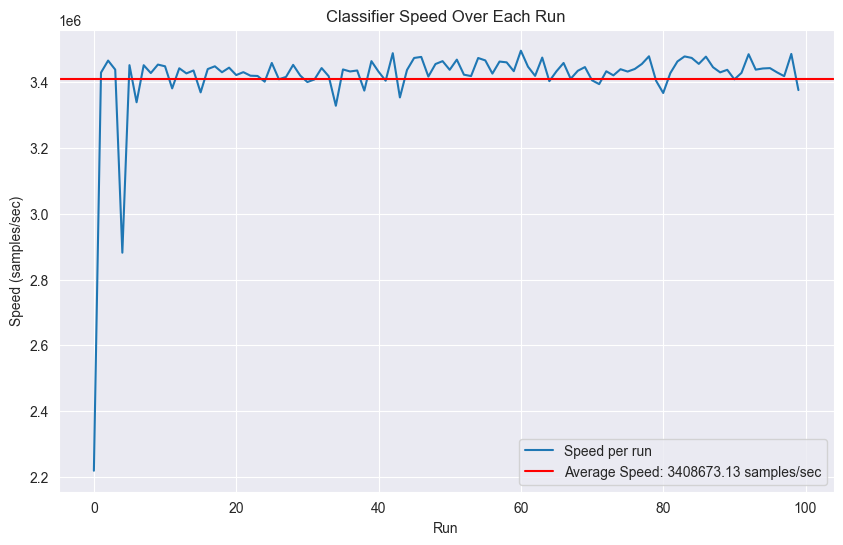

In [8]:
import matplotlib.pyplot as plt
import time
import numpy as np

total_elapsed_time = 0
total_samples = 0

num_runs = 100  # Define how many times you want to run the prediction
speeds = []  # List to hold the speed for each run

for _ in range(num_runs):
    start_time = time.time()
    predictions = model.predict(X)
    end_time = time.time()

    elapsed_time = end_time - start_time  # Time taken to make predictions in this run
    total_elapsed_time += elapsed_time  # Accumulating total elapsed time over all runs

    samples = X.shape[0]  # Number of samples in this run
    total_samples += samples  # Accumulating total number of samples over all runs

    speed = samples / elapsed_time  # Calculate speed in samples/sec for the current run
    speeds.append(speed)  # Append current speed to the list

# Calculating average speed
average_speed = total_samples / total_elapsed_time  # Calculate speed in samples/sec

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(speeds, label="Speed per run")  # Plotting speed for each run
plt.axhline(y=average_speed, color='r', linestyle='-', label=f"Average Speed: {average_speed:.2f} samples/sec")
plt.title("Classifier Speed Over Each Run")
plt.xlabel("Run")
plt.ylabel("Speed (samples/sec)")
plt.legend()
plt.show()

In [9]:
samples

12012909